<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №6

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [2]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context

**1. Загрузить датасет**

In [3]:
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [5]:
print(f'Количество отсутствующих значений {sum(sum(dataset.isnull().values))}')

Количество отсутствующих значений 0


In [10]:
dataset.isnull().values.any()

False

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [8]:
import seaborn as sns

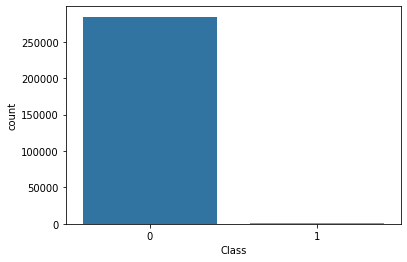

In [9]:
sns.countplot(x='Class', data=dataset)

In [6]:
dataset.groupby('Class').agg({'Class' : 'count'})

,Class
Class,
0,284315
1,492


**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [26]:
dataset.groupby('Class').agg({'Amount' : 'sum'})

,Amount
Class,
0,2.510246e+07
1,6.012797e+04


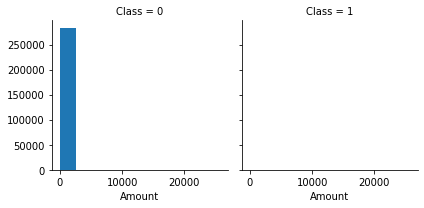

In [29]:
g = sns.FacetGrid(dataset, col="Class")
g = g.map(plt.hist, "Amount")

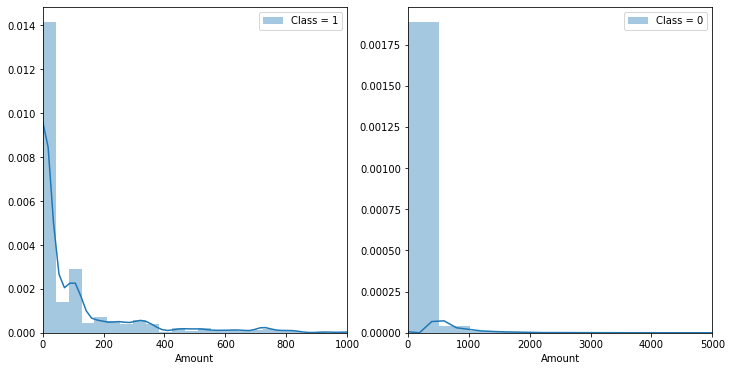

In [43]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.distplot(dataset[dataset['Class']==1]['Amount'], ax=axs[0])
axs[0].legend(['Class = 1'])
sns.distplot(dataset[dataset['Class']==0]['Amount'], ax=axs[1])
axs[1].legend(['Class = 0'])
axs[0].set_xlim(0, 1000);
axs[1].set_xlim(0, 5000);

**5. Построить графики histograms для всех значений**

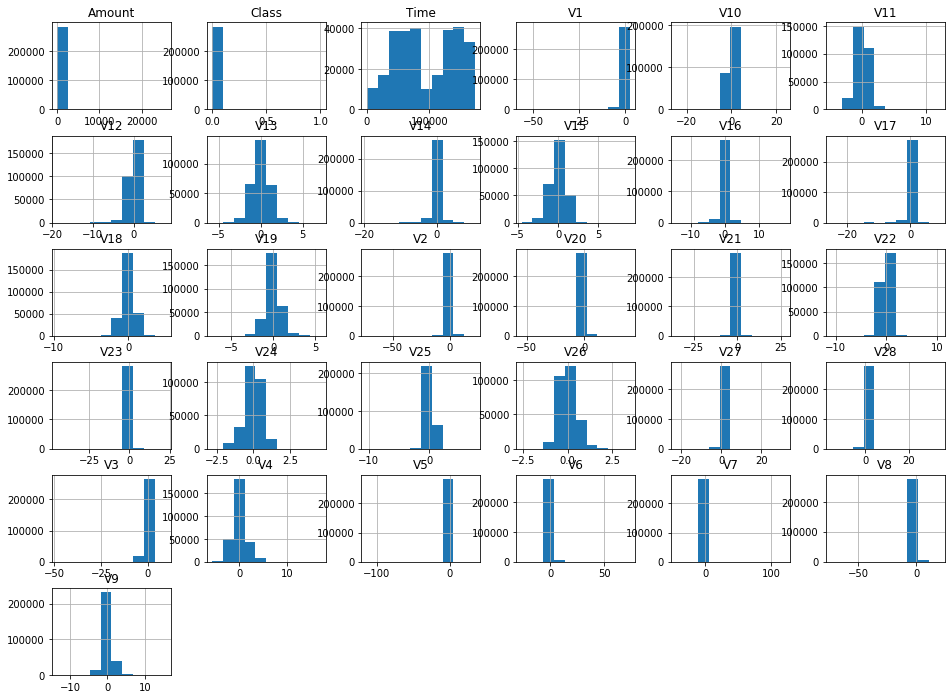

In [23]:
dataset.hist(figsize=(16, 12));

**6. Построить матрицу корреляций для всех значений**

In [21]:
import matplotlib.pyplot as plt

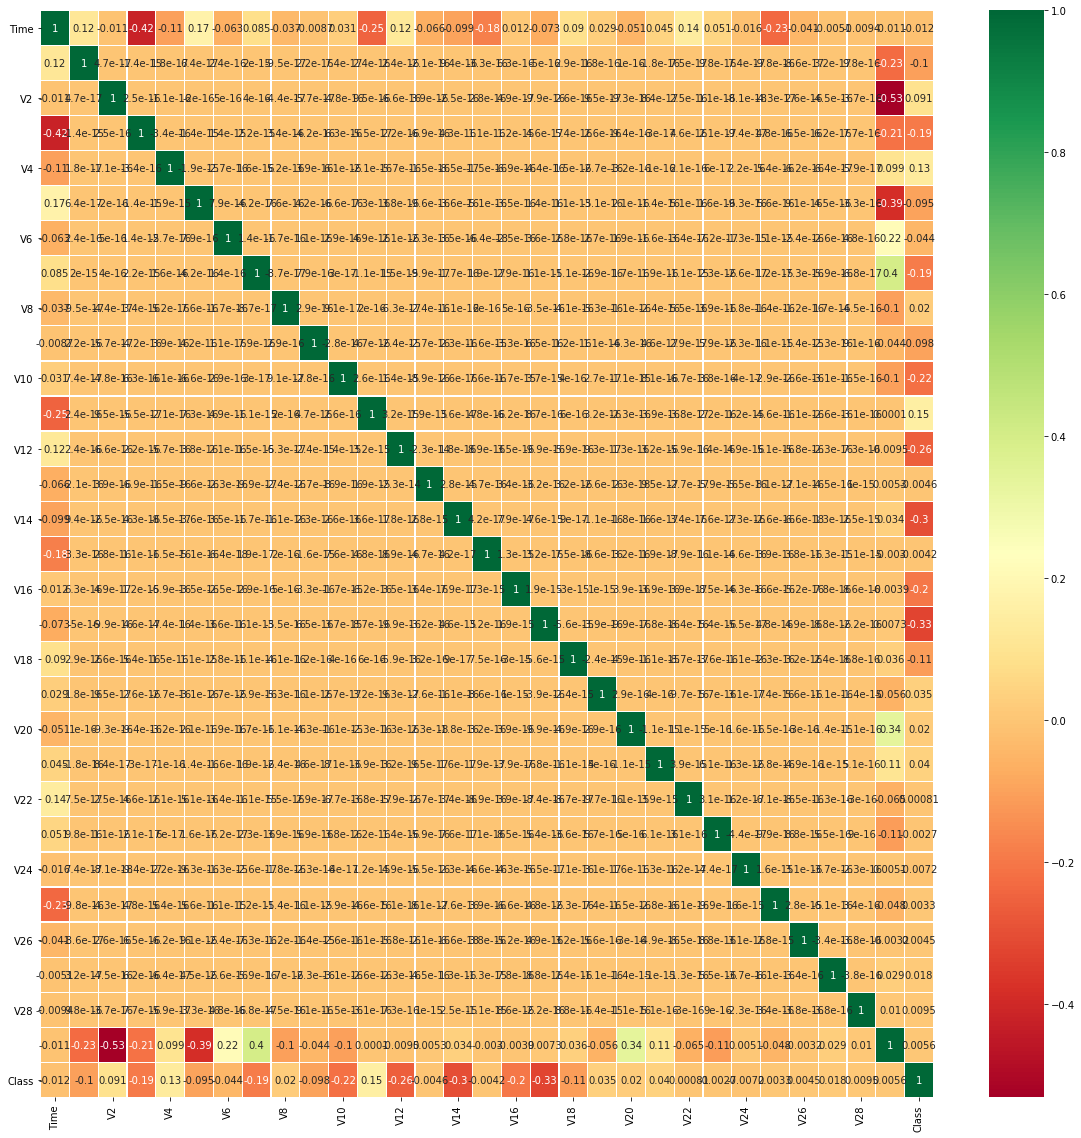

In [25]:
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

In [44]:
Y = dataset["Class"]

In [46]:
X = dataset.drop(["Class"], axis=1)

In [54]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

Модель Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [50]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Как делать classification report:

In [53]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.91      0.74      0.82       100

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



0.999420666409185

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [55]:
from sklearn import preprocessing

In [60]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(dataset)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [61]:
X_norm = df_norm.drop([30], axis=1)

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X_norm, Y, test_size = 0.2, random_state = 3)

In [63]:
model_norm=RandomForestClassifier(n_estimators=100)
model_norm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
model_pred_norm = model_norm.predict(X_test)
print(classification_report(y_test, model_pred_norm))
model_norm.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.93      0.75      0.83       100

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



0.9994557775359011

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [65]:
print('Количество значений 1го класса: ', dataset[dataset['Class']==1].shape)
print('Количество значений 2го класса: ', dataset[dataset['Class']==0].shape)

Количество значений 1го класса:  (492, 31)
Количество значений 2го класса:  (284315, 31)


In [67]:
from imblearn.over_sampling import RandomOverSampler

In [68]:
ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 227845
Количество элементов после операции: 454906


In [71]:
y_resampled.value_counts()

1    227453
0    227453
Name: Class, dtype: int64

In [72]:
model_oversample=RandomForestClassifier(n_estimators=100)
model_oversample.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
model_pred_oversample = model_oversample.predict(X_test)
print(classification_report(y_test, model_pred_oversample))
model_oversample.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.92      0.77      0.84       100

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



0.9994733330992591